In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/dataset")

dato = pd.read_csv("nafld1.csv",on_bad_lines='skip', sep=',')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Matriz de covarianza:
 [[ 1.00007961 -0.17377195]
 [-0.17377195  1.00007961]]
Eigen Vectores:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigen Valores:
 [1.17385157 0.82630766]
Autovalores en orden descendente:
1.1738515652514465
0.8263076577403534


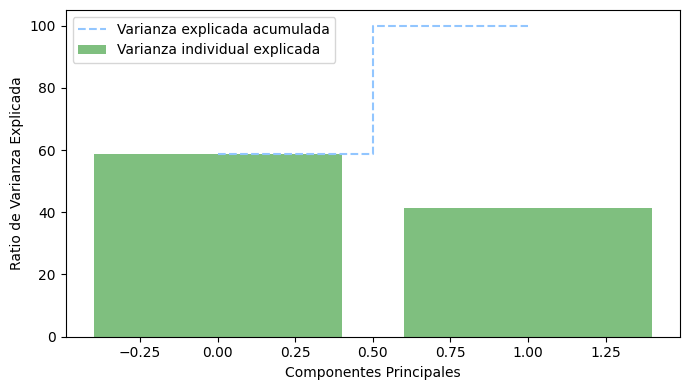

Matriz W:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


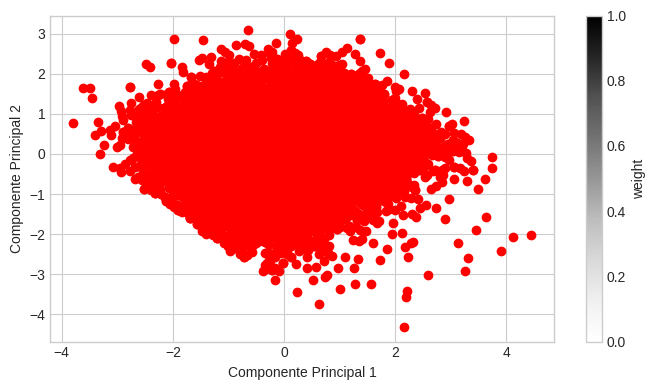

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dato = pd.read_csv("nafld1.csv", on_bad_lines='skip', sep=',')

# Eliminar datos vacíos o erróneos
dato.dropna(subset=['weight'], inplace=True)

# Convertir la columna 'Peso' a tipo numérico
dato['weights'] = pd.to_numeric(dato['weight'], errors='coerce')

# Eliminar filas con valores infinitos o NaN en otras columnas
dato = dato.replace([np.inf, -np.inf], np.nan)
dato.dropna(inplace=True)

X = dato[['age', 'height']].values
y = dato['weight'].values

X_std = StandardScaler().fit_transform(X)

print('Matriz de covarianza:\n', np.cov(X_std.T))
matriz_cov = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(matriz_cov)

print('Eigen Vectores:\n', eig_vecs)
print('Eigen Valores:\n', eig_vals)

# Reducción de dimensionalidad del dataset
eig_par = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

eig_par.sort(key=lambda x: x[0], reverse=True)

print('Autovalores en orden descendente:')
for i in eig_par:
    print(i[0])

# Calcular varianza
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Gráfico
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(7, 4))

    plt.bar(range(2), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(2), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Generar la matriz a partir de los pares autovalor-autovector
matriz_w = np.hstack((eig_par[0][1].reshape(2, 1),
                      eig_par[1][1].reshape(2, 1)))
print('Matriz W:\n', matriz_w)

Y = X_std.dot(matriz_w)

# Gráfico
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7, 4))
    plt.scatter(Y[:, 0], Y[:, 1], c='red')  # Cambiar el color de los puntos a rojo
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.colorbar(label='weight')
    plt.tight_layout()
    plt.show()